# Analysis of full frame calcium signals. 
* 3/26/2024 setup

In [1]:
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# from ydata_profiling import ProfileReport
# from src import eeg_class as ec
from src import full_frame_analysis as ffa
from src.classes import database

In [2]:
%matplotlib inline

In [2]:
db = database.ExperimentDatabase()

In [ ]:
745
740
749
880
762
761
760
874
876
885
890
898

In [4]:
database.fetch_trial(745)

{'trial_id': 745,
 'mouse_id': 33,
 'start_time': datetime.datetime(2021, 7, 7, 12, 7, 14),
 'stop_time': datetime.datetime(2021, 7, 7, 13, 7, 14),
 'behavior_file': '/data/gergely/BehaviorData/5ht2afl05b_1/5ht2afl05b_1_20210707120714.tdml',
 'tSeries_path': '/data/gergely/invivo_DATA/sleep/5HT2afl05b_1/7_7_SD/TSeries-07072021-0833_GC2-003',
 'experiment_group': 'sleep',
 'experiment_id': None}

In [3]:
tr = db.fetch_trial(745)
tr

AttributeError: 'ExperimentDatabase' object has no attribute 'fetch_trial'

In [3]:
somatic_data = [
    "/data2/gergely/invivo_DATA/sleep/5HT2afl05b_1/7_7_SD/TSeries-07072021-0833_GC2-003/TSeries-07072021-0833_GC2-003_Cycle00001_Element00001.sima/s2p_ff/suite2p/plane0/reg_tif/",
    "/data2/gergely/invivo_DATA/sleep/5HT2afl05b_1/7_7_SD/TSeries-07072021-0833_MC1-002/TSeries-07072021-0833_MC1-002_Cycle00001_Element00001.sima/s2p_ff/suite2p/plane0/reg_tif/",
    "/data2/gergely/invivo_DATA/sleep/5HT2afl05b_1/7_7_SD/TSeries-07072021-0833_MC2-004/TSeries-07072021-0833_MC2-004_Cycle00001_Element00001.sima/s2p_ff/suite2p/plane0/reg_tif/",
    "/data2/gergely/invivo_DATA/sleep/5HT2afl05b_2/7_6_SD/TSeries-07062021-0844_GC-001/TSeries-07062021-0844_GC-001_Cycle00001_Element00001.sima/s2p_ff/suite2p/plane0/reg_tif/",
    "/data2/gergely/invivo_DATA/sleep/5HT2afl05b_2/7_6_SD/TSeries-07062021-0844_MC-002/TSeries-07062021-0844_MC-002_Cycle00001_Element00001.sima/s2p_ff/suite2p/plane0/reg_tif/",
    "/data2/gergely/invivo_DATA/sleep/5HT2afl05b_2/7_6_SD/TSeries-07062021-0844_MC2-004/TSeries-07062021-0844_MC2-004_Cycle00001_Element00001.sima/s2p_ff/suite2p/plane0/reg_tif/",
    "/data2/gergely/invivo_DATA/sleep/sert52b_1/4_3_SD/TSeries-04032023-1323_SD_sess1-001/TSeries-04032023-1323_SD_sess1-001.sima/s2p_ff/suite2p/plane0/reg_tif/",
    "/data2/gergely/invivo_DATA/sleep/sert52b_1/4_3_SD/TSeries-04032023-1323_SD_sess1-001/TSeries-04032023-1323_SD_sess1-001.sima/s2p_ff/suite2p/plane1/reg_tif/",
    "/data2/gergely/invivo_DATA/sleep/sert52b_5/4_3_SD/TSeries-04032023-1323-001/TSeries-04032023-1323-001.sima/s2p_ff/suite2p/plane0/reg_tif/",
    "/data2/gergely/invivo_DATA/sleep/sert52b_5/4_3_SD/TSeries-04032023-1323-001/TSeries-04032023-1323-001.sima/s2p_ff/suite2p/plane1/reg_tif/",
]

In [ ]:
dendritic_data = []
# this has been ff registered, but need the eeg data (if exists)

In [4]:
raw_ff_data = pd.read_csv(join(somatic_data[-1], "ff_data.csv"))
raw_ff_data.head()

,File,Frame,AveragePixelValue,SequenceIndex,NREM,Baseline,DeltaF_F,FilteredAveragePixelValue
0,file000_chan0.tif,11001,363.680595,0,True,340.621726,0.067696,0.071708
1,file000_chan0.tif,11002,361.028481,1,True,340.599915,0.059978,0.071314
2,file000_chan0.tif,11003,369.999634,2,True,340.574941,0.086397,0.070925
3,file000_chan0.tif,11004,371.282375,3,True,340.521251,0.090335,0.070540
4,file000_chan0.tif,11005,373.045158,4,True,340.478465,0.095650,0.070159


In [ ]:
# ProfileReport(raw_ff_data, title="Profiling Report")

In [5]:
raw_ff_data = raw_ff_data.convert_dtypes()
raw_ff_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24756 entries, 0 to 24755
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   File                       24756 non-null  string 
 1   Frame                      24756 non-null  Int64  
 2   AveragePixelValue          24756 non-null  Float64
 3   SequenceIndex              24756 non-null  Int64  
 4   NREM                       24756 non-null  boolean
 5   Baseline                   24756 non-null  Float64
 6   DeltaF_F                   24756 non-null  Float64
 7   FilteredAveragePixelValue  24756 non-null  Float64
dtypes: Float64(4), Int64(2), boolean(1), string(1)
memory usage: 1.5 MB


In [6]:
lowcut = 0.01
highcut = 0.035
fs = 10.0

raw_ff_data["Padded_Filtered_DeltaF_F"] = ffa.bandpass_filter_with_padding(
    raw_ff_data["DeltaF_F"], lowcut, highcut, fs, order=3, pad_length=500
)

In [9]:
raw_ff_data.head()

,File,Frame,AveragePixelValue,SequenceIndex,NREM,Baseline,DeltaF_F,FilteredAveragePixelValue,Padded_Filtered_DeltaF_F
0,file000_chan0.tif,11001,363.680595,0,True,340.621726,0.067696,0.071708,0.001573
1,file000_chan0.tif,11002,361.028481,1,True,340.599915,0.059978,0.071314,0.001284
2,file000_chan0.tif,11003,369.999634,2,True,340.574941,0.086397,0.070925,0.000992
3,file000_chan0.tif,11004,371.282375,3,True,340.521251,0.090335,0.07054,0.0007
4,file000_chan0.tif,11005,373.045158,4,True,340.478465,0.09565,0.070159,0.000405


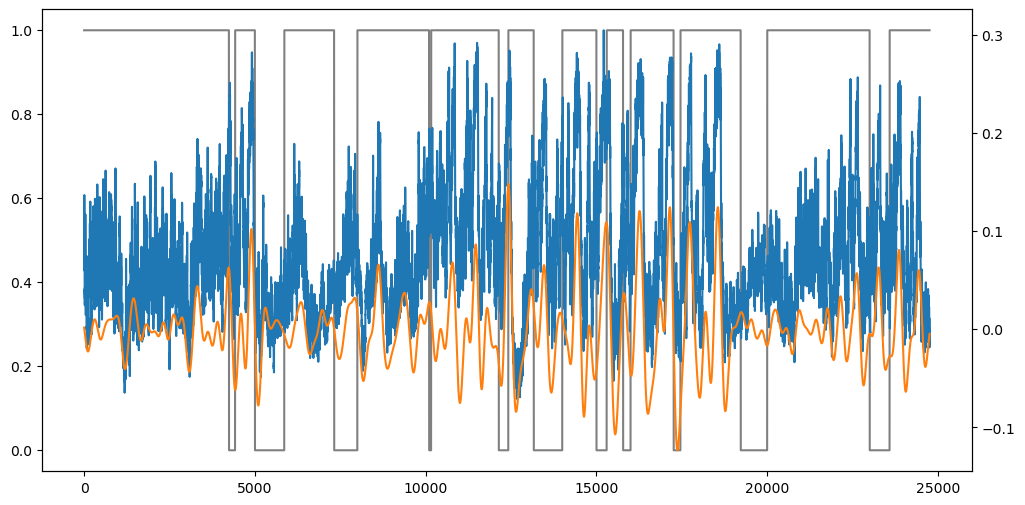

In [11]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(
    raw_ff_data["SequenceIndex"],
    raw_ff_data["NREM"],
    label="NREM Sleep Stage",
    color="grey",
)
ax2 = ax1.twinx()
ax2.plot(raw_ff_data["SequenceIndex"], raw_ff_data["DeltaF_F"])
ax2.plot(raw_ff_data["SequenceIndex"], raw_ff_data["Padded_Filtered_DeltaF_F"])

In [12]:
window_size = 64  # Number of samples in each window for calculating power
step_size = 32  # Step size for moving the window

times, power = ffa.calculate_power_over_time(
    raw_ff_data["Padded_Filtered_DeltaF_F"].to_numpy(),
    window_size,
    step_size,
    padding_type="symmetric",
)

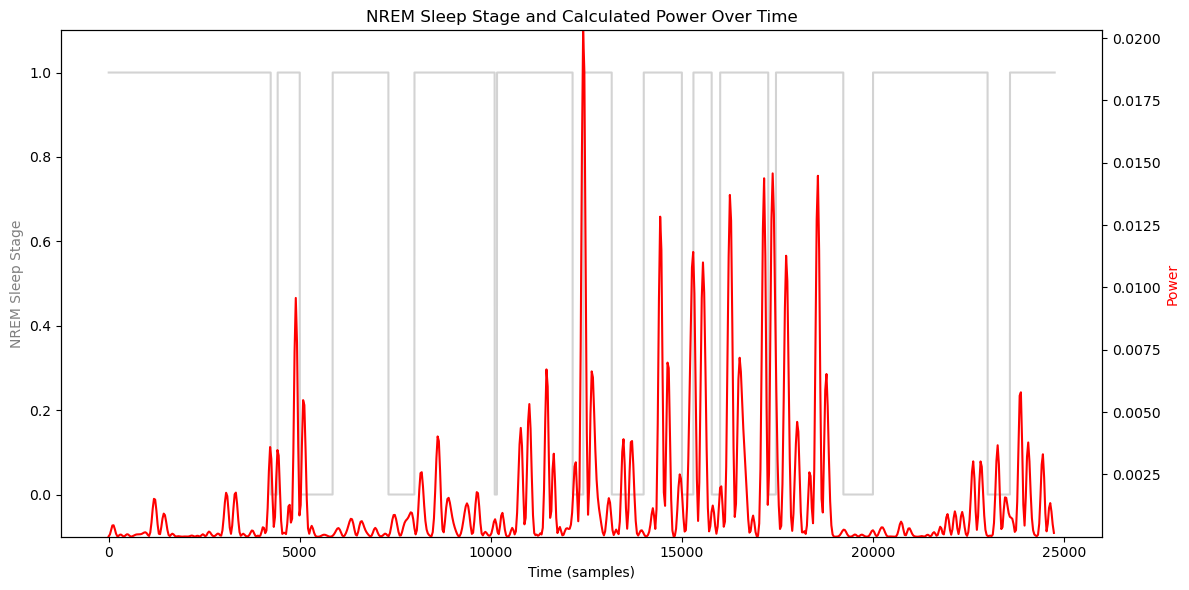

In [13]:
nrem_int = raw_ff_data["NREM"].astype(int)

total_duration = len(
    raw_ff_data["NREM"]
)  # This could be adjusted based on actual time duration or sampling rate
x_nrem = np.linspace(0, total_duration, len(nrem_int))

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot NREM data
ax1.plot(x_nrem, nrem_int, label="NREM Sleep Stage", color="lightgrey")

# Assume 'powers' are related to the 'times', plotting as scatter for visual emphasis
ax2 = ax1.twinx()  # Create a second y-axis to plot powers
ax2.plot(times, power, color="red", label="Power over Time")

# Labels and titles
ax1.set_xlabel("Time (samples)")
ax1.set_ylabel("NREM Sleep Stage", color="grey")
ax2.set_ylabel("Power", color="red")
ax1.set_title("NREM Sleep Stage and Calculated Power Over Time")
ax1.set_ylim(-0.1, 1.1)  # Adjust NREM plot limits for better visibility
ax2.set_ylim([min(power), max(power)])  # Optional: adjust based on your data

# Show plot
fig.tight_layout()  # Adjust layout to make room for the legend
plt.show()

In [14]:
downsampled_NREM = ffa.downsample_boolean_signal(nrem_int, len(power))
non_nrem_power = np.mean(power[~downsampled_NREM] ** 2)
nrem_power = np.mean(power[downsampled_NREM] ** 2)

In [15]:
print(
    f"Power during NREM sleep: {nrem_power}",
    f"Power during non-NREM sleep: {non_nrem_power}",
    sep="\n",
)

Power during NREM sleep: 9.664989304645225e-06
Power during non-NREM sleep: 9.884876155220712e-06


In [ ]:
signal_power = np.mean(raw_ff_data["Padded_Filtered_DeltaF_F"] ** 2)

print(f"Total Signal Power: {signal_power}")